In [1]:
import pandas as pd
import numpy as np
%matplotlib inline  



In [4]:
'''

Remember to use "?" before a function in Jupyter to get its spec sheet

Changing index values of a data frame:
    df.index.map(str.upper)  
    'rename' is a shortcut for mapping and can apply to the index & column

Dicretization and Binning - HISTOGRAM!
    bin_range = [a, b, c, d]
        # a is min, d is max
        # b and c are the maximum of a bin.
        # b+1 and c+1 are the minimum of the next bin.
    cats = pd.cut(original_set, bin_range)
        # Returns a "Categorical" object
        # A map of the original_set values to the bin_range values
    
    cats.codes
        # index of the levels of the Categorical object
    cats.categorization
        # level-like list of the Categories
    pd.value_counts(cats)
        # HISTOGRAM!
    
    # You can specify closed or open intervals

    # Binning functions
    cut - pd.cut(ages, bins)
    qcut
    number of bins
    quantiles
        uniformly distributed & not
        
    # Filtering outliers
    describe
    any
    all

Random Sampling
    np.random.permutation()
    df.take()
    np.random.randint
    pd.get_dummies
 
 Indicator Variables
    get_dummy
    split
    set
    union
    *variable
    enumerate
    
Putting it all together
    pd.get_dummies(pd.cut(values, bins))
    
String manipulation
    split
    strip
    +
    in
    index - raises an exception if a value is not found
    find - returns -1 if a value is not found
    count
    replace
    See Table 7-3 for Python built-in string methods

Regex 're' library -- skipped in this tutorial
    Pattern Matching
    Substitution
    Splitting
    See Table 7-4 for Python Reg-ex methods from "Re"
    
Pandas vectorized string functions - don't fail on NaN value
    contains
    df.str.findall(pattern, flags=re.IGNORECASE) - vector answer
    matches = df.str.matches(pattern, flags=re.IGNORECASE) - tuple answer
    matches.str.get(k) or matches.str[k]
        # Can only use these functions on "matches" results!!
    See Table 7-5 for Vectorized string methods
    
Summary Example
    JSON parsing
    sub-selection in a dict
    df.info
    df.group
    pd.value_counts(df.group)
    for loop over aa list
    df.duplicated().sum() to get the number of duplicates
    pd.concat(lists, ignore_index = True) to concat lists into a single df
    df.drop_duplicates()
    
    Template for changing column names
        col_mapping = {'description': 'food',
                       'group'      : 'fgroup'}
        info = info.rename(columns=col_mapping, copy=False)
    %matplotlib inline  
    
    Lambda to find max and min over two fields.
        Find minimum value: it's the value at the index of the minimum value.
        get_maximum = lambda x: x.xs(x.value.idxmax())
        max_foods = by_nutrient.apply(get_maximum)[['value','food']]


'''

'\n\nRemember to use "?" before a function in Jupyter to get its spec sheet\n\nChanging index values of a data frame:\n    df.index.map(str.upper)  \n    \'rename\' is a shortcut for mapping and can apply to the index & column\n\nDicretization and Binning - HISTOGRAM!\n    bin_range = [a, b, c, d]\n        # a is min, d is max\n        # b and c are the maximum of a bin.\n        # b+1 and c+1 are the minimum of the next bin.\n    cats = pd.cut(original_set, bin_range)\n        # Returns a "Categorical" object\n        # A map of the original_set values to the bin_range values\n    \n    cats.codes\n        # index of the levels of the Categorical object\n    cats.categorization\n        # level-like list of the Categories\n    pd.value_counts(cats)\n        # HISTOGRAM!\n    \n    # You can specify closed or open intervals\n\n    # Binning functions\n    cut - pd.cut(ages, bins)\n    qcut\n    number of bins\n    quantiles\n        uniformly distributed & not\n        \n    # Filterin

In [5]:
# Renaming Axis Indices - Modifying the indices
data = pd.DataFrame(np.arange(12).reshape((3,4))
                   ,index=['Ohio', 'Colorado', 'New York']
                   ,columns=['one','two','three','four'])
data.index.map(str.upper)
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [6]:
# Rename is a shortcut to map and can apply to the index and columns
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [7]:
# Instead of passing a function you can pass a dict-like mapping
data.rename(index={'Ohio':'Indiana'}, columns={'three':'pekaboo'})

,one,two,pekaboo,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [8]:
# Modify in-place as usual. The fun single underscore is a convention
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [9]:
# Discretization and Binning - Map a value to a bin range
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
ages
bins = [18, 25, 35, 60, 100]
# 18 - 25, 26-35, 36-60, 61-100
# First number is min, last number is max
# Intermediate numbers are the top number of a bin.
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [10]:
# Categorical objects are complex
# contain "codes" and "categories"
# akin to the levels and the index of a level
cats.codes # Indicates the index of the bin assigned

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [11]:
# See which bins are used by the category
cats.categories

Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [12]:
# Histogram of the bins
# pd.value_counts(cats)
cats.value_counts()  
    # value_counts is a function whereas codes and categories
    # are references to attributes of the object

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [13]:
# By default intervals are Closed.  Can specifcy Open intervals instead
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [14]:
# Instead  have the integers index a Categorical object
# , you can have labels
group_names = ['Youth', 'YoungAdult', 'MiddleAges', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAges, MiddleAges, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAges < Senior]

In [15]:
# You can simply pass a number of bins instead of ranges,
# and pd.cut() will build uniformly wide bins based on the range of the data
# Uniformly wide means that many of the data points may be clustered in the same bin

data = np.random.rand(20)
cats = pd.cut(data, 4, precision=2) # Precision is the number of decimal points
pd.value_counts(cats)

(0.04, 0.27]    6
(0.72, 0.94]    5
(0.27, 0.49]    5
(0.49, 0.72]    4
dtype: int64

In [16]:
# You can divide the data into uniformly distributed quantile range bins
# Data is then uniformly distributed between the bins
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
pd.value_counts(cats)

(0.71, 3.175]        250
(0.00727, 0.71]      250
(-0.691, 0.00727]    250
[-3.0882, -0.691]    250
dtype: int64

In [17]:
# Can pass our own quantiles rather than uniformly distributed quantiles
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.301, 0.00727], (-1.301, 0.00727], (0.00727, 1.286], (0.00727, 1.286], (0.00727, 1.286], ..., (0.00727, 1.286], (1.286, 3.175], (0.00727, 1.286], (0.00727, 1.286], (0.00727, 1.286]]
Length: 1000
Categories (4, object): [[-3.0882, -1.301] < (-1.301, 0.00727] < (0.00727, 1.286] < (1.286, 3.175]]

In [18]:
#### Outliers and Filtering
np.random.seed(12345)
data = pd.DataFrame(np.random.randn(1000,5))  ## numpy random array function 1000 rows, 5 columns
data.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.031122,-0.032282,0.018177,-0.036982,0.017707
std,0.960407,1.001069,0.992179,1.031637,0.988017
min,-2.989741,-3.184377,-3.428254,-3.745356,-3.645860
25%,-0.578799,-0.713906,-0.631797,-0.751732,-0.644144
50%,0.033821,-0.039304,-0.009480,-0.093756,0.016363
75%,0.678922,0.629516,0.685231,0.654848,0.721822
max,3.366626,3.927528,3.248944,3.260383,2.667864


In [19]:
# Example: Filter values with abs value > 3 on one of the columns
col = data[3]
col[np.abs(col) > 3]

244   -3.399312
259    3.260383
320   -3.745356
399   -3.056990
646   -3.548824
Name: 3, dtype: float64

In [20]:
# "any" filter: Select all rows from any column exceeding 3
(np.abs(data) > 3).any(1)
    # any(1) means return True for rows if column-by-column is True under a logical OR
    # any(0) means return False for columns if row-by-row is True under a logical OR

0      False
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
dtype: bool

In [21]:
# Pull back those rows the usual Boolean filtering way
data[(np.abs(data) >= 3).any(1) ]

,0,1,2,3,4
4,-0.539741,0.476985,3.248944,-1.021228,-0.577087
78,0.106061,3.927528,-0.255126,0.854137,-0.364807
82,3.176873,0.959533,-0.975340,-1.116742,-1.104376
244,-2.315555,0.457246,-0.025907,-3.399312,-0.974657
259,-0.817649,0.050188,1.951312,3.260383,0.963301
320,0.146326,0.508391,-0.196713,-3.745356,-1.520113
399,-1.341493,-0.293333,-0.242459,-3.056990,1.918403
418,0.326045,0.425384,-3.428254,-0.296336,-0.439938
469,1.179227,-3.184377,1.369891,-1.074833,-0.089937
646,0.208011,-0.150923,-0.362528,-3.548824,1.553205


In [22]:
# Broadcast across the whole array using the ufunc np.sign(data)
data[np.abs(data) > 3] = np.sign(data) * 3

In [23]:
data.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.030579,-0.033551,0.018356,-0.035492,0.018352
std,0.958637,0.995513,0.989999,1.025289,0.985829
min,-2.989741,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.578799,-0.713906,-0.631797,-0.751732,-0.644144
50%,0.033821,-0.039304,-0.009480,-0.093756,0.016363
75%,0.678922,0.629516,0.685231,0.654848,0.721822
max,3.000000,3.000000,3.000000,3.000000,2.667864


In [24]:
data

,0,1,2,3,4
0,-0.204708,0.478943,-0.519439,-0.555730,1.965781
1,1.393406,0.092908,0.281746,0.769023,1.246435
2,1.007189,-1.296221,0.274992,0.228913,1.352917
3,0.886429,-2.001637,-0.371843,1.669025,-0.438570
4,-0.539741,0.476985,3.000000,-1.021228,-0.577087
5,0.124121,0.302614,0.523772,0.000940,1.343810
6,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757
7,0.560145,-1.265934,0.119827,-1.063512,0.332883
8,-2.359419,-0.199543,-1.541996,-0.970736,-1.307030
9,0.286350,0.377984,-0.753887,0.331286,1.349742


In [25]:
## Permutation and Random Sampling of Rows of a Series or DataFrame

# Building a matrix dataframe
df = np.arange(5*4).reshape((5,4))
df = pd.DataFrame(df)
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [26]:
# Permutation operations on Series or Rows of a dataframe
sampler = np.random.permutation(5)
sampler

array([0, 1, 2, 4, 3])

In [27]:
# "take" function - sample without replacement
df.take(sampler)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
4,16,17,18,19
3,12,13,14,15


In [28]:
# Take a function used with permutation to get a random sample of the matrix:
# This isn't efficient but is effective
df.take(np.random.permutation(len(df)))

,0,1,2,3
3,12,13,14,15
2,8,9,10,11
4,16,17,18,19
1,4,5,6,7
0,0,1,2,3


In [29]:
## Sample WITH replacement -- Just use randint() to simulate die rolls
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)
sampler

array([2, 4, 2, 3, 4, 2, 0, 2, 0, 0])

In [30]:
# Using sampler as the index, use Take to sample those index values
bag.take(sampler) # A random list of the values in the array

array([-1,  4, -1,  6,  4, -1,  5, -1,  5,  5])

In [31]:
## Indicator "Dummy" Variables - get_dummies()
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [32]:
# get_dummies(df['key']) pulls the named key column into axis=0
# and the other column values become the other axis index.
# A "1" occurs wherever the originalrow [a,b] matches the new (a, b)
pd.get_dummies(df['key'])

,a,b,c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [33]:
# Joining the indicator matrix to the original value
dummies = pd.get_dummies(df['key'], prefix='key')
print dummies
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

   key_a  key_b  key_c
0    0.0    1.0    0.0
1    0.0    1.0    0.0
2    1.0    0.0    0.0
3    0.0    0.0    1.0
4    1.0    0.0    0.0
5    0.0    1.0    0.0


,data1,key_a,key_b,key_c
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,1.0,0.0,0.0
3,3,0.0,0.0,1.0
4,4,1.0,0.0,0.0
5,5,0.0,1.0,0.0


In [34]:
# Create indicator variables for each genre in th emovies data set
# The values to use as indicator variables will be in axis = 0 (columns)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch07/movies.dat',sep='::', header=None, names=mnames, engine='python')
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [35]:
# Split the "Genres" column using split, set, union, enumerate, for, ix

# With a Lambda, creates a tuple
# movies['genres'].apply(lambda x: set(x.split('|')))

# With a set.union trick using an iterator
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

# Create data frame of zeroes for each movie entry and genre
dummies = pd.DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

# Iterate through that array of zeries -- slow!
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1
dummies[:10]

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
# Combine with the "movies" to see the indicator variables for each movie
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0] # Shows the movie at entry 0, as a series. [0]--> as DF

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [37]:
## Combine get_dummies with a discretization function like cut

values = np.random.rand(10) # 10 random numbers in rand [0, 1)
values

array([ 0.96239814,  0.59692855,  0.36358998,  0.30993813,  0.02133332,
        0.66468371,  0.8167201 ,  0.89877405,  0.34744095,  0.66683314])

In [38]:
# Create bins from [0,1] by steps of 0.2
bins = np.arange(0,1.01, 0.2)
bins

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [39]:
pd.get_dummies(pd.cut(values, bins))

,"(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1]"
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,1.0
8,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0


In [40]:
## String Manipulation
# split() -- break apart a string by a given character
val = 'a, b,   guido'
val.split(',')

['a', ' b', '   guido']

In [41]:
# strip() -- remove white space from the beginning and ending of a string
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [42]:
# concatenation with "+"
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [43]:
# Substring detection with in, index, find
print 'guido' in val
print val.index(',') # Location of first instance of the passed substring
print val.find(':') # -1 because substring does not exist in variable

True
1
-1


In [44]:
# Count number of occurrences of a particular substring
val.count(',')

2

In [45]:
# Substitute occurrences of one pattern for another
val.replace(',', '::')

'a:: b::   guido'

In [46]:
# "replace" is often useful for deletions
val.replace(',','')

'a b   guido'

In [48]:
# Pandas Vectorized String Functions
# Missing Data - usually just skipped in native applications
data = {'Dave': 'dave@google.com', 
        'Steve': 'steve@gmail.com', 
        'Rob': 'rob@gmail.com',
        'Wes': np.nan}
data = pd.Series(data)
data.isnull()
data.map(lambda x: 'gmail' in x)
    # This fails on the "na" value because it can't be iterated over
    # We want to treat this as a vector, not as a thing to iterate over

TypeError: argument of type 'float' is not iterable

In [49]:
# Missing Data is not skipped in Pandas vectorized str functions
# Vectorized functions operate act only on the values, not on the key
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [50]:
# They also work with regular expressions
# A pattern for standard email ___@___.__
# df.str.findall(pattern, flags=re.IGNORECASE)

import re
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'
    # For some reason the book has: pattern = r'([A-Z....])'
print pattern
data.str.findall(pattern, flags=re.IGNORECASE)

([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})


Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [51]:
# Vectorized element retrieval using "match"
# The functions presented below don't work on "findall"
matches = data.str.match(pattern, flags = re.IGNORECASE)
matches
print "**Get value at index 1: "
print matches.str.get(1)
print "**Get value at index 0: "
print matches.str[0]
print "**Slice the first 5 places in the string: "
print data.str[:5]

**Get value at index 1: 
Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object
**Get value at index 0: 
Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object
**Slice the first 5 places in the string: 
Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  app.launch_new_instance()


In [52]:
## Example: USDA Food Database
# JSON data: ch07/foods-2011-10-03.json
# Each entry in db is a dict containing all the data for a single food
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
db[0]

{u'description': u'Cheese, caraway',
 u'group': u'Dairy and Egg Products',
 u'id': 1008,
 u'manufacturer': u'',
 u'nutrients': [{u'description': u'Protein',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 25.18},
  {u'description': u'Total lipid (fat)',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 29.2},
  {u'description': u'Carbohydrate, by difference',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 3.06},
  {u'description': u'Ash', u'group': u'Other', u'units': u'g', u'value': 3.28},
  {u'description': u'Energy',
   u'group': u'Energy',
   u'units': u'kcal',
   u'value': 376.0},
  {u'description': u'Water',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 39.28},
  {u'description': u'Energy',
   u'group': u'Energy',
   u'units': u'kJ',
   u'value': 1573.0},
  {u'description': u'Fiber, total dietary',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 0.0},
  {u'description': u'Calcium, Ca',
   u'group': u'Elements',
   

In [ ]:
db[1]

In [53]:
# Create a dataframe of nutrients on a specific food product
# The nutrients field is list containing 1 dict for each nutrient
# There are several other fields
# db[0] is "Cheese, caraway"
nutrients = pd.DataFrame(db[0]['nutrients'])
print nutrients[:7]
db[0].keys()

                   description        group units    value
0                      Protein  Composition     g    25.18
1            Total lipid (fat)  Composition     g    29.20
2  Carbohydrate, by difference  Composition     g     3.06
3                          Ash        Other     g     3.28
4                       Energy       Energy  kcal   376.00
5                        Water  Composition     g    39.28
6                       Energy       Energy    kJ  1573.00


[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [54]:
# Create df of basic info on each food product
# Take a subset of those fields
# Notice manufacturer appears blank in some rows
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [55]:
# Notice that "manufacturer" has fewer non-null entries
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.4+ KB


In [56]:
# Create a histogram of the "Group" field.
# It is sorted in descending order by default
pd.value_counts(info['group'])[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [57]:
# Assemble the nutrients from each food in a single large table
#    a. Convert each list of food nutrients to a DataFrame
#    b. Add a column for the food id
#    c. Append the DataFrame to a list
#    d. Concatenate those lists together with concat
#    e. Check for data errors such as duplicates

## We're taking a JSON and making it tabular

In [58]:
# Create a df of the nutrients for all of the foods by food id
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id'] # The id is the same for each row (i.e. food) in the DB
    nutrients.append(fnuts) # Append each new nutrient row into a dataframe
nutrients = pd.concat( nutrients, ignore_index = True)
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [59]:
# Count the number of duplicates
print nutrients.duplicated().sum()
nutrients = nutrients.drop_duplicates()

14179


In [60]:
# Rename columns in info to "food" and "food group"
col_mapping = {'description': 'food',
               'group'      : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.4+ KB


In [61]:
# Rename the columns in the nutrients list to something more useful
col_mapping = {'description': 'nutrient', 'group': 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [62]:
# Merge Nutrients with the Foods on the food id
# Called "id" in both df's
# As  left join, will show the nutrients in all foods
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [72]:
ndata.ix[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

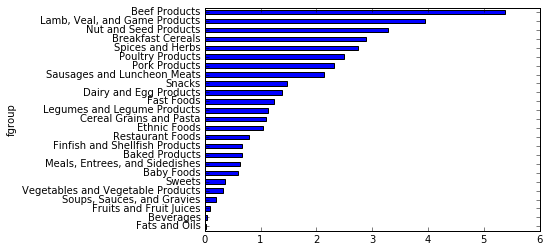

In [74]:
result = ndata.groupby(['nutrient', 'fgroup']).quantile(0.5)['value']
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [65]:
# Break out an interesting lambda into multiple steps
# The lambda is operating over a groupby statement - it is saying find
# the max (or min) grouped over those two fields.
by_nutrient = ndata.groupby(['nutgroup','nutrient'])
get_maximum = lambda x: x.xs(x.value.idxmax())

get_minimum = lambda x: x.xs(x.value.idxmin()) # not used here

max_foods = by_nutrient.apply(get_maximum)[['value','food']]
max_foods.food = max_foods.food.str[:50] # Slice food.
max_foods.ix['Amino Acids']

# The max  in 1 line: 
#ndata.groupby(['nutgroup','nutrient']).apply(lambda x: x.xs(x.value.idxmax()))[['value','food']].ix['Amino Acids']

,value,food
nutrient,,
Alanine,8.009,"Gelatins, dry powder, unsweetened"
Arginine,7.436,"Seeds, sesame flour, low-fat"
Aspartic acid,10.203,Soy protein isolate
Cystine,1.307,"Seeds, cottonseed flour, low fat (glandless)"
Glutamic acid,17.452,Soy protein isolate
Glycine,19.049,"Gelatins, dry powder, unsweetened"
Histidine,2.999,"Whale, beluga, meat, dried (Alaska Native)"
Hydroxyproline,0.803,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA..."
Isoleucine,4.300,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."
